# 기본 준비

## 라이브러리 및 환경설정

In [2]:
# 기본라이브러리 import
from google.colab import drive
import os, json, pickle
import subprocess
import itertools
import hashlib
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.metrics import f1_score, roc_curve, auc, accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import learning_curve

In [3]:
!wget https://raw.githubusercontent.com/DidierStevens/DidierStevensSuite/master/pdf-parser.py

--2025-09-25 02:54:47--  https://raw.githubusercontent.com/DidierStevens/DidierStevensSuite/master/pdf-parser.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78422 (77K) [text/plain]
Saving to: ‘pdf-parser.py’

pdf-parser.py       100%[===================>]  76.58K  --.-KB/s    in 0.01s   

2025-09-25 02:54:47 (5.63 MB/s) - ‘pdf-parser.py’ saved [78422/78422]



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
colab_path = '/content/drive/MyDrive/haksul/notebook/'
pdfdata_path = '/content/pdfdata/'
pdfid_path = './pdfid/pdfid.py'
pdf_parser_path= './pdf-parser.py'

In [6]:
pd.set_option('display.max_columns', None)

## 데이터 불러오기

In [7]:
df = pd.read_csv(colab_path + "data_feature/feature_processed.csv",index_col='filename')
df_benign = pd.read_csv(colab_path + "data_feature/feature_processed_benign.csv",index_col='filename')
df

,label,source,is_pdf,error,size,/Page,/Encrypt,/ObjStm,/JS,/JavaScript,/AA,/OpenAction,/AcroForm,/JBIG2Decode,/RichMedia,/Launch,/EmbeddedFile,/XFA,/URI,/Colors > 2^24,has_MZ,has_PK,obj_diff,stream_diff,xref_diff
filename,,,,,,,,,,,,,,,,,,,,,,,,,
rp-11-41.pdf,0,CIC,True,False,65867.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0
rp-09-51.pdf,0,CIC,True,False,16457.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0
n-10-69.pdf,0,CIC,True,False,15739.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0
f8594.pdf,0,CIC,True,False,87068.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0
n-09-50.pdf,0,CIC,True,False,46393.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VirusShare_280d5f39c217d8501626adc86221c752,1,virustotal,True,False,369652.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0,0,0.0,0.0,0.0
VirusShare_c1bbc46bc72890d301469dd7d281b019,1,virustotal,True,False,92201.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.0,0.0,0.0
VirusShare_8c831c5f1b28e66f132385692aebe59c,1,virustotal,True,False,12327.0,1.0,0.0,0.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,1.0


In [8]:
df_benign

,label,source,is_pdf,error,size,/Page,/Encrypt,/ObjStm,/JS,/JavaScript,/AA,/OpenAction,/AcroForm,/JBIG2Decode,/RichMedia,/Launch,/EmbeddedFile,/XFA,/URI,/Colors > 2^24,has_MZ,has_PK,obj_diff,stream_diff,xref_diff
filename,,,,,,,,,,,,,,,,,,,,,,,,,
rp-11-41.pdf,0,CIC,True,False,65867.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0
rp-09-51.pdf,0,CIC,True,False,16457.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0
n-10-69.pdf,0,CIC,True,False,15739.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0
f8594.pdf,0,CIC,True,False,87068.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0.0
n-09-50.pdf,0,CIC,True,False,46393.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Polish_CNAstatement.pdf,0,CIC,True,False,181488.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0
faqs_for_tax_forms_102510.pdf,0,CIC,True,False,34751.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0,0,0.0,0.0,0.0
n-08-77.pdf,0,CIC,True,False,16299.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0


In [9]:
feature_processed_benign = df[df['label'] == 0]

#feature_processed_benign.to_csv(colab_path + "data_feature/feature_processed_benign.csv")

print("feature_processed_benign.csv saved successfully.")

feature_processed_benign.csv saved successfully.


# isolate random forest

In [10]:
from sklearn.ensemble import IsolationForest

# Select the features for Isolation Forest from the benign data
features_benign = df[df['label'] == 0].select_dtypes(include=np.number).drop(columns=['label'])

# Initialize and train the Isolation Forest model on benign data
iso_forest_benign = IsolationForest(contamination='auto', random_state=42)
iso_forest_benign.fit(features_benign)

# Select the same features from the original dataframe for prediction
features_all = df.select_dtypes(include=np.number).drop(columns=['label'])

# Predict anomaly scores for all data points using the model trained on benign data
df['anomaly_score_benign_trained'] = iso_forest_benign.decision_function(features_all)

In [11]:
# Get examples of benign and potentially malicious files
benign_examples = df[df['label'] == 0].head(3)
malicious_examples = df[df['label'] == 1].head(3)

print("Anomaly scores for 3 benign examples:")
display(benign_examples[['label', 'anomaly_score_benign_trained']])

print("\nAnomaly scores for 3 potentially malicious examples:")
display(malicious_examples[['label', 'anomaly_score_benign_trained']])

Anomaly scores for 3 benign examples:


,label,anomaly_score_benign_trained
filename,,
rp-11-41.pdf,0,0.159574
rp-09-51.pdf,0,0.185544
n-10-69.pdf,0,0.094437



Anomaly scores for 3 potentially malicious examples:


,label,anomaly_score_benign_trained
filename,,
VirusShare_acb219b6c1f208479efba65395e1ca97,1,0.120427
VirusShare_fd1209e58aed3e9ea7982d800129aff8,1,0.136382
VirusShare_efb587e1e35d8d9e36833298456e0cf1,1,0.132822


In [12]:

# Display the list of features used by the Isolation Forest model
print("Features used by the Isolation Forest model:")
print(features_all.columns.tolist())

Features used by the Isolation Forest model:
['size', '/Page', '/Encrypt', '/ObjStm', '/JS', '/JavaScript', '/AA', '/OpenAction', '/AcroForm', '/JBIG2Decode', '/RichMedia', '/Launch', '/EmbeddedFile', '/XFA', '/URI', '/Colors > 2^24', 'has_MZ', 'has_PK', 'obj_diff', 'stream_diff', 'xref_diff']


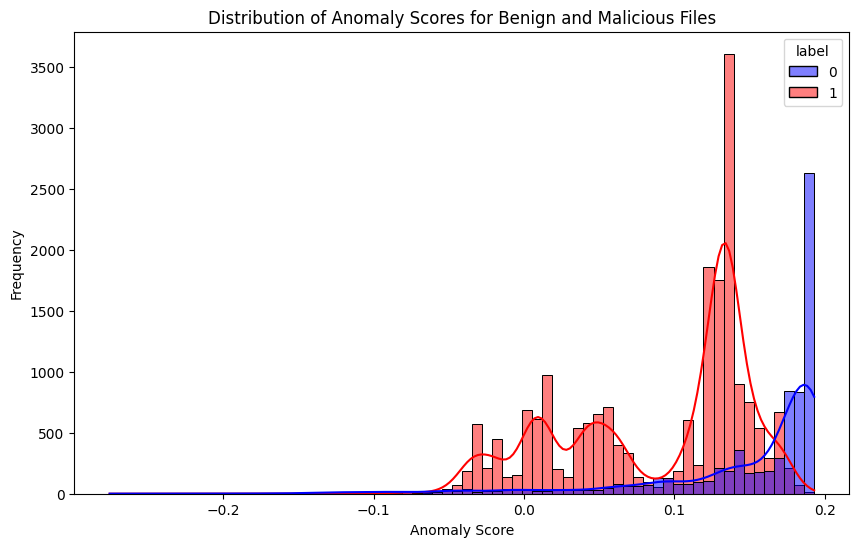

In [13]:
# Visualize the anomaly scores
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='anomaly_score_benign_trained', hue='label', palette={0: 'blue', 1: 'red'}, kde=True)
plt.title('Distribution of Anomaly Scores for Benign and Malicious Files')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

# 모델 개량

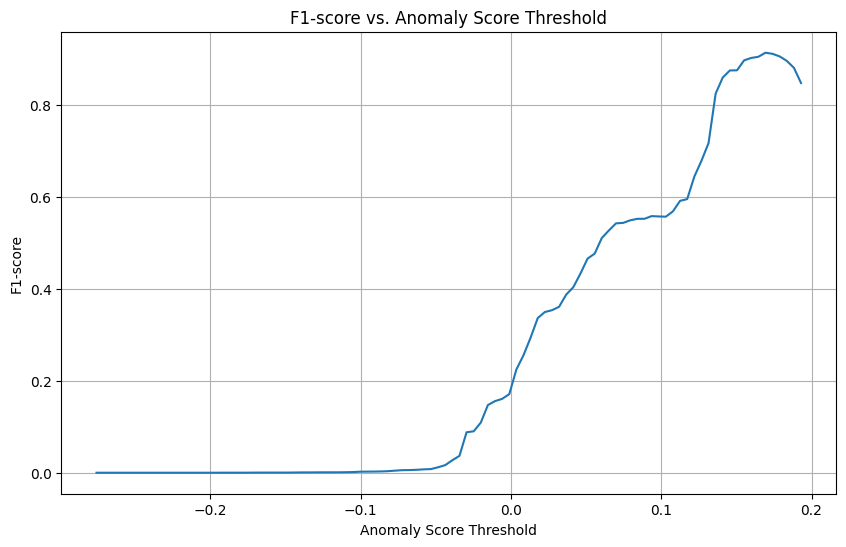

Optimal Threshold: 0.1693465499874528
Optimal F1-score: 0.9146700893706028

Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.88      0.60      0.72      7498
           1       0.87      0.97      0.91     19851

    accuracy                           0.87     27349
   macro avg       0.87      0.79      0.82     27349
weighted avg       0.87      0.87      0.86     27349



In [14]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Define a range of thresholds to evaluate
# You can adjust this range based on the distribution of anomaly scores observed in the histogram
thresholds = np.linspace(df['anomaly_score_benign_trained'].min(), df['anomaly_score_benign_trained'].max(), 100)

f1_scores = []
for threshold in thresholds:
    # Classify as malicious (1) if anomaly score is below the threshold, benign (0) otherwise
    # Isolation Forest's decision_function returns negative values for anomalies.
    # So, a lower score indicates a higher anomaly (malicious) probability.
    # We want to classify scores below the threshold as malicious (label 1)
    predicted_labels = (df['anomaly_score_benign_trained'] < threshold).astype(int)

    # Calculate F1-score
    f1 = f1_score(df['label'], predicted_labels)
    f1_scores.append(f1)

# Plot the F1-scores for different thresholds
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores)
plt.title('F1-score vs. Anomaly Score Threshold')
plt.xlabel('Anomaly Score Threshold')
plt.ylabel('F1-score')
plt.grid(True)
plt.show()

# Find the threshold that maximizes the F1-score
optimal_threshold_index = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_threshold_index]
optimal_f1_score = f1_scores[optimal_threshold_index]

print(f"Optimal Threshold: {optimal_threshold}")
print(f"Optimal F1-score: {optimal_f1_score}")

# Classify using the optimal threshold and print the classification report
optimal_predicted_labels = (df['anomaly_score_benign_trained'] < optimal_threshold).astype(int)
print("\nClassification Report with Optimal Threshold:")
print(classification_report(df['label'], optimal_predicted_labels))

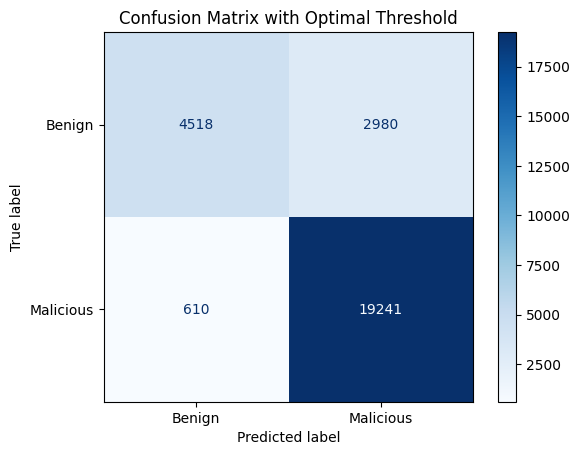


Accuracy: 0.868733774543859
F1-score: 0.9146700893706028


In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score

# Classify the entire dataset using the optimal threshold
# optimal_predicted_labels was already computed in the previous cell
# optimal_predicted_labels = (df['anomaly_score_benign_trained'] < optimal_threshold).astype(int)

# Generate the confusion matrix
cm = confusion_matrix(df['label'], optimal_predicted_labels)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign', 'Malicious'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix with Optimal Threshold')
plt.show()

# Calculate and print Accuracy and F1-score
accuracy = accuracy_score(df['label'], optimal_predicted_labels)
f1 = f1_score(df['label'], optimal_predicted_labels)

print(f"\nAccuracy: {accuracy}")
print(f"F1-score: {f1}")

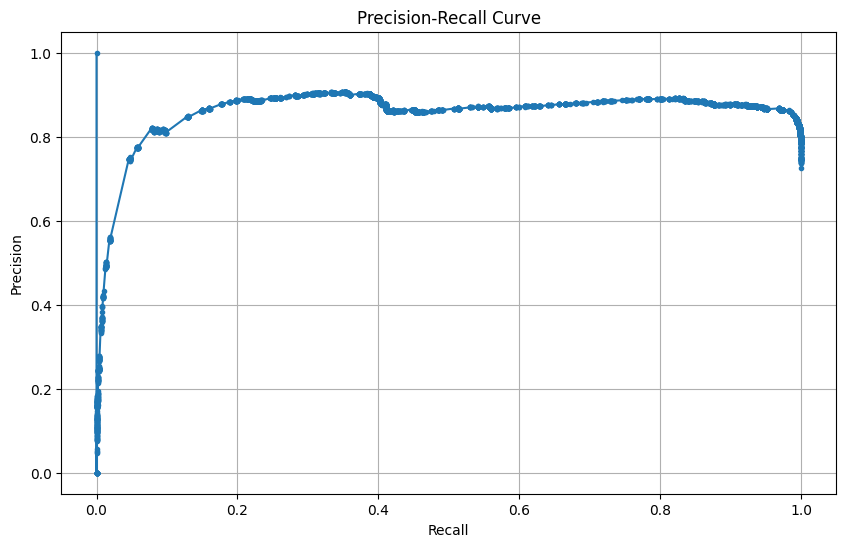

In [16]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(df['label'], -df['anomaly_score_benign_trained'])

# Plot the precision-recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

# Calculate and print the Average Precision Score (optional but helpful)
# ap_score = average_precision_score(df['label'], -df['anomaly_score_benign_trained'])
# print(f"\nAverage Precision Score: {ap_score}")

In [17]:
from sklearn.metrics import recall_score

# Calculate recall using the optimal predicted labels and true labels
# optimal_predicted_labels was computed when finding the optimal threshold
recall = recall_score(df['label'], optimal_predicted_labels)

print(f"Recall: {recall}")

Recall: 0.9692710694675332


## 모델 저장

In [18]:
import pickle
import os

# Define the directory and filename for saving the model
model_dir = os.path.join(colab_path, 'model')
model_filename = 'model_isolate_randomforest.pkl'
model_filepath = os.path.join(model_dir, model_filename)

# Create the directory if it doesn't exist
os.makedirs(model_dir, exist_ok=True)

# Save the trained Isolation Forest model
#with open(model_filepath, 'wb') as f:
    #pickle.dump(iso_forest_benign, f)

print(f"Isolation Forest model saved successfully to: {model_filepath}")

Isolation Forest model saved successfully to: /content/drive/MyDrive/haksul/notebook/model/model_isolate_randomforest.pkl
